# Implementation of Multilayer Perceptron from Scratch

:label:`chapter_mlp_scratch`


Now that we know how multilayer perceptrons (MLPs) work in theory,
let's implement them. First, we import the required packages.

In [1]:
import d2l
from mxnet import nd, gluon

To compare against the results
we previously achieved with vanilla softmax regression,
we continue to use the Fashion-MNIST image classification dataset.

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## Initialize Model Parameters

Recall that this dataset contains 10 classes and that
each image consists of a $28 \times 28 = 784$ grid of pixel values.
Since we'll be discarding the spatial strucutre (for now),
we can just think of this as a classifiation dataset
with $784$ input features and $10$ classes.
In particular we will implement our MLP
with one hidden layer and $256$ hidden units.
Note that we can regard both of these choices as *hyperparameters*
that could be set based on performance on validation data.
Typically, we'll choose layer widths as powers of $2$
to make everything align nicely in memory.

Again, we will allocate several NDArrays to represent our parameters.
Note that we now have one weight matrix and one bias vector *per layer*.
As always, we must call `attach_grad` to allocate memory for the gradients with respect to these parameters.

In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

## Activation Function

To make sure we know how everything works,
we will use the `maximum` function to implement ReLU ourselves,
instead of invoking `nd.relu` directly.

In [4]:
def relu(X):
    return nd.maximum(X, 0)

## The model

As in softmax regression, we will `reshape` each 2D image
into a flat vector of length  `num_inputs`.
Finally, we cam implement our model with just a few lines of code.

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(nd.dot(X, W1) + b1)
    return nd.dot(H, W2) + b2

## The Loss Function

For better numerical stability and because we already know
how to implement softmax regression completely from scratch in :numref:`chapter_softmax_scratch`,
we will use Gluon's integrated function
for calculating the softmax and cross-entropy loss.
Recall that we discussed some of these intricacies
in :numref:`chapter_mlp`.
We encourage the interested reader to examing the source code
for `mxnet.gluon.loss.SoftmaxCrossEntropyLoss` for more details.

In [6]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

## Training

Steps for training the MLP are no different than for softmax regression.
In the `d2l` package, we directly call the `train_ch3` function, whose implementation was introduced in :numref:`chapter_softmax_scratch`.
We set the number of epochs to $10$ and the learning rate to $0.5$.

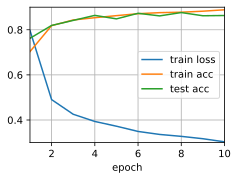

In [7]:
num_epochs, lr = 10, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, 
             lambda batch_size: d2l.sgd(params, lr, batch_size))

To see how well we did, let's apply the model to some test data.
If you're interested, compare the result to corresponding linear model in :numref:`chapter_softmax_scratch`.

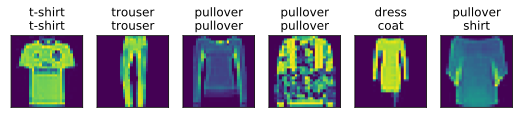

In [8]:
d2l.predict_ch3(net, test_iter)

This looks a bit better than our previous result, a good sign that we're on the right path.

## Summary

We saw that implementing a simple MLP is easy, even when done manually.
That said, with a large number of layers, this can get messy
(e.g. naming and keeping track of the model parameters, etc).

## Exercises

1. Change the value of the hyper-parameter `num_hiddens` in order to see how this hyperparameter influences your results.
1. Try adding a new hidden layer to see how it affects the results.
1. How does changing the learning rate change the result.
1. What is the best result you can get by optimizing over all the parameters (learning rate, iterations, number of hidden layers, number of hidden units per layer)?

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2339)

![](../img/qr_mlp-scratch.svg)